# Sound generation for Images based on environment recognition

## Group 6
#### Kaustubh Raval
#### Raghavendra Shreenivas Acharya

### Importing the libraries 

In [1]:
import os
import glob
import sys
from collections import OrderedDict
import numpy as np
import PIL
from PIL import Image
import cv2
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
# ----------------------
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Setting path for the dataset
Here Directory "ML Project\dataset" is used to store the dataset

In [3]:
base_path = r"D:\ML Project\dataset"

### OS walk to get folders of 6 different categories for the given path

In [4]:
load_base = next(os.walk(base_path))[1]
print(load_base)

['beach', 'building', 'desert', 'forest', 'lake', 'sky']


### Pre-preprocessing

### Creating a list for all images under the given path
### Creating a list for all labels for related images

In [5]:
all_labels = list()
all_images = list()
for dir_ in load_base:
    new_path = os.path.join(base_path, dir_)
    
    all_ = glob.glob(new_path + '\*.jpg')
    all_labels.append([dir_] * len(all_))
    all_images.append(all_)

#### List of the labels

In [6]:
all_labels[1]


['building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',
 'building',

### List of the images

In [7]:
all_images[1]

['D:\\ML Project\\dataset\\building\\00000001.jpg',
 'D:\\ML Project\\dataset\\building\\00000002.jpg',
 'D:\\ML Project\\dataset\\building\\00000003.jpg',
 'D:\\ML Project\\dataset\\building\\00000004.jpg',
 'D:\\ML Project\\dataset\\building\\00000005.jpg',
 'D:\\ML Project\\dataset\\building\\00000006.jpg',
 'D:\\ML Project\\dataset\\building\\00000007.jpg',
 'D:\\ML Project\\dataset\\building\\00000008.jpg',
 'D:\\ML Project\\dataset\\building\\00000009.jpg',
 'D:\\ML Project\\dataset\\building\\00000010.jpg',
 'D:\\ML Project\\dataset\\building\\00000011.jpg',
 'D:\\ML Project\\dataset\\building\\00000012.jpg',
 'D:\\ML Project\\dataset\\building\\00000013.jpg',
 'D:\\ML Project\\dataset\\building\\00000014.jpg',
 'D:\\ML Project\\dataset\\building\\00000015.jpg',
 'D:\\ML Project\\dataset\\building\\00000016.jpg',
 'D:\\ML Project\\dataset\\building\\00000017.jpg',
 'D:\\ML Project\\dataset\\building\\00000018.jpg',
 'D:\\ML Project\\dataset\\building\\00000019.jpg',
 'D:\\ML Pro

### Creating dictionary for labels and images according to the labels

In [8]:
dict_images_labels = dict()
print(new_path)

D:\ML Project\dataset\sky


### Zipping images and according labels  to create dictionary

In [9]:
for images_, labels_ in zip(all_images, all_labels):
    label = labels_[0]
    temp_array = []
    dict_images_labels[label] = np.array([np.array(Image.open(fname)) for fname in images_])
        

### Generating pickle file

In [5]:
pickle_filepath = r'D:\\ML Project\\dataset\pickled_sun.obj'

In [11]:
with open(pickle_filepath, 'wb') as pickle_:
    pickle.dump(dict_images_labels, pickle_)

### Loading the generated pickle file

In [6]:
temp_dict = dict()
with open(pickle_filepath, 'rb') as pcload:
    temp_dict = pickle.load(pcload)

In [7]:
temp_dict

{'beach': array([array([[[166, 187, 214],
         [166, 187, 214],
         [166, 187, 214],
         ...,
         [153, 178, 208],
         [153, 178, 208],
         [153, 178, 208]],
 
        [[166, 187, 214],
         [166, 187, 214],
         [166, 187, 214],
         ...,
         [153, 178, 208],
         [153, 178, 208],
         [153, 178, 208]],
 
        [[166, 187, 214],
         [166, 187, 214],
         [166, 187, 214],
         ...,
         [153, 178, 208],
         [153, 178, 208],
         [153, 178, 208]],
 
        ...,
 
        [[190, 170, 146],
         [184, 164, 139],
         [179, 157, 133],
         ...,
         [185, 168, 138],
         [184, 167, 137],
         [185, 168, 138]],
 
        [[191, 171, 147],
         [191, 171, 146],
         [190, 168, 144],
         ...,
         [186, 169, 139],
         [185, 168, 138],
         [187, 170, 140]],
 
        [[198, 178, 153],
         [197, 175, 151],
         [196, 172, 146],
         ...,
         [18

## Preprocessing the dataset

### Creating lists for images and labels

In [8]:
list_i = list()
list_l = list()

for key in temp_dict.keys():
    for img in temp_dict[key]:
        list_i.append(img)
        list_l.append(key)

### Creating numpy arrays of the images and labels

In [9]:
np_i = np.asarray(list_i)
np_l = np.asarray(list_l)

### Reshaping the given images into 256x256 dimentions using cv2.resize

In [10]:
new_i =[]
new_l =[]
for i in range(0,len(np_i)):
    if(np_i[i].shape[2] == 3):
        new_i.append(cv2.resize(np_i[i], (256,256)))
        new_l.append(np_l[i])
        

    

### Doing Onehot encoding for the labels

In [11]:
onehot_l = pd.get_dummies(new_l)
X = np.asarray(new_i)/1.0
y = np.asarray(onehot_l)

In [12]:
X

array([[[[166., 187., 214.],
         [166., 187., 214.],
         [166., 187., 214.],
         ...,
         [153., 178., 208.],
         [153., 178., 208.],
         [153., 178., 208.]],

        [[166., 187., 214.],
         [166., 187., 214.],
         [166., 187., 214.],
         ...,
         [153., 178., 208.],
         [153., 178., 208.],
         [153., 178., 208.]],

        [[166., 187., 214.],
         [166., 187., 214.],
         [166., 187., 214.],
         ...,
         [153., 178., 208.],
         [153., 178., 208.],
         [153., 178., 208.]],

        ...,

        [[190., 170., 146.],
         [184., 164., 139.],
         [179., 157., 133.],
         ...,
         [185., 168., 138.],
         [184., 167., 137.],
         [185., 168., 138.]],

        [[191., 171., 147.],
         [191., 171., 146.],
         [190., 168., 144.],
         ...,
         [186., 169., 139.],
         [185., 168., 138.],
         [187., 170., 140.]],

        [[198., 178., 153.],
       

In [13]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

### Normalizing the numpy array of images by dividing it with 255, so every values can be inbetween 0 to 1

In [14]:
import time 
for i in range(len(X)):
    X[i] = X[i]/255
    if(i%500 == 0):
        time.sleep(2)

In [15]:
X

array([[[[0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         ...,
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627]],

        [[0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         ...,
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627]],

        [[0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         ...,
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627]],

        ...,

        [[0.74509804, 0.66666667, 0.57254902],
         [0.72156863, 0.64313725, 0.54509804]

## Generating pickle After preprocessing the data

In [5]:
pickle_X = r'D:\picklefiles\pickled_X.obj'
pickle_y = r'D:\picklefiles\pickled_y.obj'

In [17]:
with open(pickle_X, 'wb') as pickle_:
    pickle.dump(X, pickle_)

In [18]:
with open(pickle_y, 'wb') as pickle_:
    pickle.dump(y, pickle_)

### Fetching from the pickle files

In [6]:
with open(pickle_X, 'rb') as pcload:
    X1 = pickle.load(pcload)

In [7]:
with open(pickle_y, 'rb') as pcload:
    y1 = pickle.load(pcload)

In [8]:
X1

array([[[[0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         ...,
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627]],

        [[0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         ...,
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627]],

        [[0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         [0.65098039, 0.73333333, 0.83921569],
         ...,
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627],
         [0.6       , 0.69803922, 0.81568627]],

        ...,

        [[0.74509804, 0.66666667, 0.57254902],
         [0.72156863, 0.64313725, 0.54509804]

### Spliting the images in testing and training dataset using train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=42)

#### Shape of the training and testing data

In [10]:
print(X_train.shape)
print(y_train.shape)

(2158, 256, 256, 3)
(2158, 6)


# Creating the first CNN model

# Convolutional Neural Networks (CNNs)

The convolutional neural network (CNN) is a neural network technology that has profoundly impacted the area of computer vision (CV). In CNN, we use the following layer types:

* **Dense Layers** - Fully connected layers.  
* **Convolution Layers** - Used to scan across images. 
* **Max Pooling Layers** - Used to downsample images. 
* **Dropout Layer** - Prevent overfitting 
* **Flatten Layer** - Transform data of any shape into one dimensional  

## Convolution Layers

For the convolutional layer, We must specify the following hyper-parameters :

* Number of filters
* Filter Size
* Padding
* Activation Function/Non-Linearity


A filter is a square-shaped object that scans over the image. The more filters that we give to a convolutional layer, the more features it can detect.


## Max Pooling Layers

Max-pool layers downsample the data.  This technique can avoid overfitting.

# Defining CNN architecture now

In [11]:
cnn1 = Sequential()

Next, we add the input layer.

The Conv2D layer creates a convolution kernel that is convolved with the layer input to produce outputs. Provide the following:

*  The number of convolution filters (neurons) to use

* kernel_size specifies the height and width of the 2D convolution window

* padding: one of "valid" or "same".  ***valid***: no padding. ***same***: zero padding.


* ***input_shape: should be the shape of 1 sample.*** In this case, it should (28, 28, 1) that corresponds to  the (rows, cols, depth) of each digit image.  When using Conv2D layer as the first layer in a model, you must provide input_shape, e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures.

#### Also defining monitor for early stopping

In [12]:
monitor = EarlyStopping(monitor='val_loss', min_delta = 1e-3, patience = 10, verbose=1, mode='auto')

### CNN1

In [13]:
cnn1.add(Conv2D(128, (3, 3), padding='same', input_shape=X_train.shape[1:]))
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))


cnn1.add(Conv2D(64, (3, 3), padding='same'))
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25))

cnn1.add(Conv2D(32, (3, 3), padding='same'))
cnn1.add(Activation('relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.25))

cnn1.add(Flatten())
cnn1.add(Dense(128))
cnn1.add(Activation('relu'))
cnn1.add(Dense(6, activation="softmax"))
cnn1.compile(loss='categorical_crossentropy', optimizer='adam')
cnn1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 256, 256, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      73792     
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0

### Fitting the model on traing dataset

In [14]:
cnn1_history = cnn1.fit(X_train, y_train, validation_data = (X_test, y_test), verbose = 1, epochs = 100, callbacks=[monitor])

Train on 2158 samples, validate on 540 samples
Epoch 1/100
2158/2158 [==============================] - 18s 8ms/sample - loss: 1.3727 - val_loss: 1.1407
Epoch 2/100
2158/2158 [==============================] - 13s 6ms/sample - loss: 0.8879 - val_loss: 0.9195
Epoch 3/100
2158/2158 [==============================] - 13s 6ms/sample - loss: 0.8145 - val_loss: 0.9500
Epoch 4/100
2158/2158 [==============================] - 13s 6ms/sample - loss: 0.7014 - val_loss: 0.8298
Epoch 5/100
2158/2158 [==============================] - 13s 6ms/sample - loss: 0.5288 - val_loss: 0.8198
Epoch 6/100
2158/2158 [==============================] - 13s 6ms/sample - loss: 0.4132 - val_loss: 0.8176
Epoch 7/100
2158/2158 [==============================] - 13s 6ms/sample - loss: 0.2696 - val_loss: 0.9106TA: 1s - loss:
Epoch 8/100
2158/2158 [==============================] - 13s 6ms/sample - loss: 0.2203 - val_loss: 0.9728
Epoch 9/100
2158/2158 [==============================] - 13s 6ms/sample - loss: 0.1651 - va

In [15]:
y_pred = cnn1.predict(X_test)

## Evaluate Metrics using Sklearn for CNN1

In [18]:
from sklearn import metrics

y_true = np.argmax(y_test,axis=1)
pred = np.argmax(y_pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, pred))

Accuracy: 0.6981481481481482
Averaged F1: 0.6967794691281992
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        92
           1       0.70      0.83      0.76        98
           2       0.70      0.68      0.69        91
           3       0.82      0.77      0.79        87
           4       0.71      0.59      0.65        88
           5       0.70      0.74      0.72        84

    accuracy                           0.70       540
   macro avg       0.70      0.70      0.70       540
weighted avg       0.70      0.70      0.70       540



Text(0, 0.5, 'Loss Value')

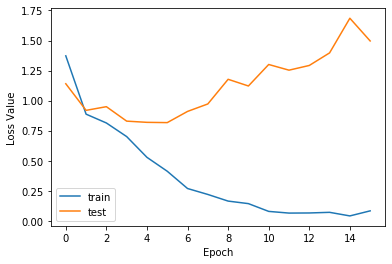

In [19]:
plt.plot(cnn1_history.history['loss'], label='train')
plt.plot(cnn1_history.history['val_loss'], label='test')
plt.legend(loc="lower left")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")

### CNN2

In [21]:
cnn2 = Sequential()
cnn2.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))


cnn2.add(Conv2D(64, (3, 3), padding='same'))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.25))

cnn2.add(Conv2D(128, (3, 3), padding='same'))
cnn2.add(Activation('relu'))
cnn2.add(MaxPooling2D(pool_size=(2, 2)))
cnn2.add(Dropout(0.25))

cnn2.add(Flatten())
cnn2.add(Dense(128))
cnn2.add(Activation('relu'))
cnn2.add(Dense(6, activation="softmax"))
cnn2.compile(loss='categorical_crossentropy', optimizer='adam')
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_4 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
activation_5 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 64)       

In [22]:
cnn2_history = cnn2.fit(X_train, y_train, validation_data = (X_test, y_test), verbose = 1, epochs = 100, callbacks=[monitor])

Train on 2158 samples, validate on 540 samples
Epoch 1/100
2158/2158 [==============================] - 9s 4ms/sample - loss: 1.9811 - val_loss: 1.0961 ETA: 5s - loss: 3 - ETA: 4s - loss: 2.81 - ETA: 4s  - ETA: 2s - loss - ETA: 1s - loss: 2.157 - ETA: 1s - l
Epoch 2/100
2158/2158 [==============================] - 7s 3ms/sample - loss: 0.9367 - val_loss: 0.9424- ETA: 3s - loss: - ETA: 2s - l - ETA: 
Epoch 3/100
2158/2158 [==============================] - 7s 3ms/sample - loss: 0.8004 - val_loss: 0.8477
Epoch 4/100
2158/2158 [==============================] - 7s 3ms/sample - loss: 0.6839 - val_loss: 0.9777
Epoch 5/100
2158/2158 [==============================] - 7s 3ms/sample - loss: 0.5238 - val_loss: 0.8597
Epoch 6/100
2158/2158 [==============================] - 7s 3ms/sample - loss: 0.3554 - val_loss: 1.0385ss: - ETA: 1s - loss: 0.370 - ETA: 1s - loss:  - ETA: 0s - loss: 
Epoch 7/100
2158/2158 [==============================] - 7s 3ms/sample - loss: 0.2529 - val_loss: 1.0704
Epoch 8

In [23]:
y_pred = cnn2.predict(X_test)

## Evaluate Metrics using Sklearn for CNN2

In [24]:
from sklearn import metrics

y_true = np.argmax(y_test,axis=1)
pred = np.argmax(y_pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, pred))

Accuracy: 0.7166666666666667
Averaged F1: 0.7022190934763296
              precision    recall  f1-score   support

           0       0.80      0.38      0.51        92
           1       0.74      0.76      0.75        98
           2       0.70      0.85      0.77        91
           3       0.66      0.90      0.76        87
           4       0.79      0.55      0.64        88
           5       0.70      0.89      0.79        84

    accuracy                           0.72       540
   macro avg       0.73      0.72      0.70       540
weighted avg       0.73      0.72      0.70       540



Text(0, 0.5, 'Loss Value')

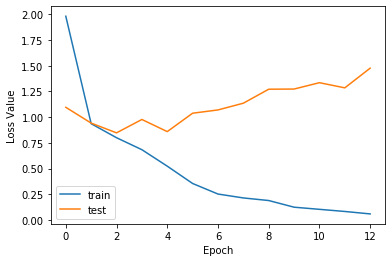

In [25]:
plt.plot(cnn2_history.history['loss'], label='train')
plt.plot(cnn2_history.history['val_loss'], label='test')
plt.legend(loc="lower left")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")

### CNN3

In [26]:
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dense(6, activation='softmax'))

cnn3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
cnn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 246016)           

In [27]:
cnn3_history = cnn3.fit(X_train, y_train, validation_data = (X_test, y_test), verbose = 1, epochs = 100, callbacks=[monitor])

Train on 2158 samples, validate on 540 samples
Epoch 1/100
2158/2158 [==============================] - 8s 4ms/sample - loss: 4.2371 - accuracy: 0.3897 - val_loss: 1.1844 - val_accuracy: 0.5593
Epoch 2/100
2158/2158 [==============================] - 7s 3ms/sample - loss: 0.8938 - accuracy: 0.6867 - val_loss: 0.9536 - val_accuracy: 0.6593
Epoch 3/100
2158/2158 [==============================] - 6s 3ms/sample - loss: 0.7786 - accuracy: 0.7326 - val_loss: 1.0478 - val_accuracy: 0.6444
Epoch 4/100
2158/2158 [==============================] - 6s 3ms/sample - loss: 0.6276 - accuracy: 0.7794 - val_loss: 0.8573 - val_accuracy: 0.7222
Epoch 5/100
2158/2158 [==============================] - 6s 3ms/sample - loss: 0.4461 - accuracy: 0.8475 - val_loss: 0.8480 - val_accuracy: 0.7000
Epoch 6/100
2158/2158 [==============================] - 6s 3ms/sample - loss: 0.2899 - accuracy: 0.9138 - val_loss: 0.8428 - val_accuracy: 0.7259
Epoch 7/100
2158/2158 [==============================] - 6s 3ms/sample 

In [28]:
from sklearn import metrics

y_true = np.argmax(y_test,axis=1)
y_pred = cnn3.predict(X_test)
pred = np.argmax(y_pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, pred))

Accuracy: 0.7
Averaged F1: 0.6931294828102685
              precision    recall  f1-score   support

           0       0.66      0.55      0.60        92
           1       0.68      0.81      0.73        98
           2       0.70      0.76      0.73        91
           3       0.71      0.89      0.79        87
           4       0.73      0.49      0.59        88
           5       0.75      0.70      0.72        84

    accuracy                           0.70       540
   macro avg       0.70      0.70      0.69       540
weighted avg       0.70      0.70      0.69       540



Text(0, 0.5, 'Loss Value')

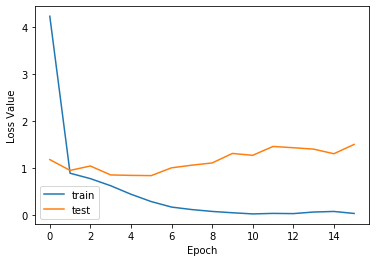

In [29]:
plt.plot(cnn3_history.history['loss'], label='train')
plt.plot(cnn3_history.history['val_loss'], label='test')
plt.legend(loc="lower left")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")

## CNN4

In [30]:
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=X_train.shape[1:]))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(64, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(6, activation='softmax'))

cnn4.compile(loss= 'categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['accuracy'])

In [31]:
cnn4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 252, 252, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 252, 252, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 124, 124, 64)     

In [32]:
EPOCHS = 100
BS = 32
 
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
    horizontal_flip=True, fill_mode="nearest")
 
# training the network
cnn4_history = cnn4.fit_generator(aug.flow(X_train, y_train, batch_size=BS),
    validation_data=(X_test, y_test), steps_per_epoch=len(X_train) // BS,
    epochs=EPOCHS, callbacks=[monitor])

Epoch 1/100
67/67 [==============================] - 37s 551ms/step - loss: 2.0756 - accuracy: 0.3175 - val_loss: 9.1679 - val_accuracy: 0.1704
Epoch 2/100
67/67 [==============================] - 35s 515ms/step - loss: 1.6028 - accuracy: 0.4511 - val_loss: 2.0215 - val_accuracy: 0.2463
Epoch 3/100
67/67 [==============================] - 34s 512ms/step - loss: 1.6722 - accuracy: 0.4247 - val_loss: 3.0127 - val_accuracy: 0.2407
Epoch 4/100
67/67 [==============================] - 35s 518ms/step - loss: 1.3211 - accuracy: 0.5165 - val_loss: 3.1742 - val_accuracy: 0.2370
Epoch 5/100
67/67 [==============================] - 34s 513ms/step - loss: 1.1953 - accuracy: 0.5602 - val_loss: 1.8036 - val_accuracy: 0.3593
Epoch 6/100
67/67 [==============================] - 35s 519ms/step - loss: 1.1522 - accuracy: 0.6040 - val_loss: 1.7767 - val_accuracy: 0.3870
Epoch 7/100
67/67 [==============================] - 34s 515ms/step - loss: 1.0678 - accuracy: 0.6181 - val_loss: 0.9655 - val_accuracy:

In [33]:
from sklearn import metrics

y_true = np.argmax(y_test,axis=1)
y_pred = cnn4.predict(X_test)
pred = np.argmax(y_pred,axis=1)


score = metrics.accuracy_score(y_true, pred)
print('Accuracy: {}'.format(score))


f1 = metrics.f1_score(y_true, pred, average='weighted')
print('Averaged F1: {}'.format(f1))

           
print(metrics.classification_report(y_true, pred))

Accuracy: 0.8222222222222222
Averaged F1: 0.8202781662476992
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        92
           1       0.89      0.92      0.90        98
           2       0.82      0.80      0.81        91
           3       0.83      0.97      0.89        87
           4       0.75      0.69      0.72        88
           5       0.94      0.69      0.79        84

    accuracy                           0.82       540
   macro avg       0.83      0.82      0.82       540
weighted avg       0.83      0.82      0.82       540



Text(0, 0.5, 'Loss Value')

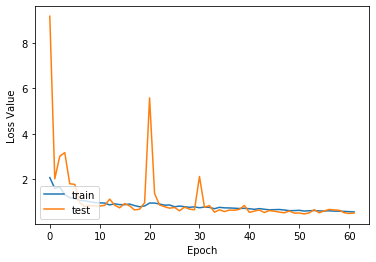

In [34]:
plt.plot(cnn4_history.history['loss'], label='train')
plt.plot(cnn4_history.history['val_loss'], label='test')
plt.legend(loc="lower left")
plt.xlabel("Epoch")
plt.ylabel("Loss Value")

## Confusion matrix 

In [35]:
true_classes = np.argmax(y_test, axis = 1)
predicted_classes = np.argmax(y_pred,axis = 1)

In [36]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize = (5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

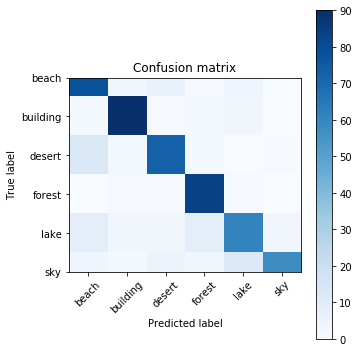

In [37]:
cm = confusion_matrix(true_classes, predicted_classes)
plot_confusion_matrix(cm, load_base)

# Testing

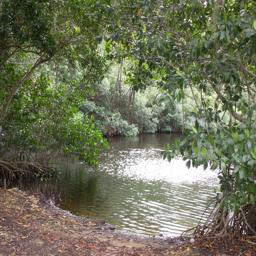

In [38]:
test_imagepath = r'D:\TestMlProject\fo1.jpg'
test = Image.open(test_imagepath)
test

### Resizing the image using cv2.resize in 256x256 and dividing the numpy array by 255 to normalize the image for testing as we did for the training images 

In [39]:
np_test = np.asarray(test)
re_test = cv2.resize(np_test, (256,256))/255
re_test.shape

(256, 256, 3)

In [40]:
re_test

array([[[0.34901961, 0.36470588, 0.29803922],
        [0.28627451, 0.31372549, 0.24313725],
        [0.34901961, 0.38039216, 0.29803922],
        ...,
        [0.21960784, 0.24705882, 0.08235294],
        [0.1372549 , 0.16470588, 0.        ],
        [0.16078431, 0.18823529, 0.02352941]],

       [[0.2745098 , 0.29019608, 0.22352941],
        [0.33333333, 0.36470588, 0.28235294],
        [0.29803922, 0.32941176, 0.23921569],
        ...,
        [0.38039216, 0.40784314, 0.23529412],
        [0.25098039, 0.27843137, 0.10588235],
        [0.20392157, 0.23137255, 0.05882353]],

       [[0.22745098, 0.24705882, 0.16862745],
        [0.38431373, 0.41568627, 0.33333333],
        [0.20784314, 0.23921569, 0.14901961],
        ...,
        [0.43921569, 0.4745098 , 0.29019608],
        [0.39607843, 0.43137255, 0.24705882],
        [0.39215686, 0.42745098, 0.24313725]],

       ...,

       [[0.46666667, 0.39607843, 0.34117647],
        [0.50588235, 0.43529412, 0.38823529],
        [0.52156863, 0

### Generating the output_labels using the trained model

In [41]:
# output_labels = model.predict(re_test.reshape(1,256,256,3))
output_labels = cnn4.predict(re_test.reshape(1,256,256,3))
output_labels

array([[2.1460208e-03, 3.8384149e-04, 9.2363611e-05, 9.8561931e-01,
        1.1350512e-02, 4.0793876e-04]], dtype=float32)

###  Getting the top 2 labels from the predicted outputs

In [42]:
sorted_op = np.sort(output_labels)

In [43]:
max1 = sorted_op[0][5]
max2 = sorted_op[0][4]
print(max1,max2)

0.9856193 0.011350512


In [44]:
print(output_labels[0])
print(sorted_op)

[2.1460208e-03 3.8384149e-04 9.2363611e-05 9.8561931e-01 1.1350512e-02
 4.0793876e-04]
[[9.2363611e-05 3.8384149e-04 4.0793876e-04 2.1460208e-03 1.1350512e-02
  9.8561931e-01]]


In [45]:
predicted_labels = [0,0]

for f in range(5):
    if(output_labels[0][f] == max1):
        predicted_labels[0] = f
        
    if(output_labels[0][f] == max2):
        predicted_labels[1] = f
        
print(predicted_labels)

[3, 4]


###  These are the top 2 labels which we got 

In [46]:
dict_output = {0:'beach', 1:'building', 2:'desert', 3:'forest', 4:'lake', 5:'sky'}

In [47]:
print("First Label: " + dict_output[predicted_labels[0]] + "\nSecond Label: " + dict_output[predicted_labels[1]])

First Label: forest
Second Label: lake


## Playing the sound according to the labels

In [48]:
path_sound = 'D:\\Sounds'
new_paath = os.path.join(path_sound, dict_output[predicted_labels[0]])

In [49]:
import IPython.display as ipd
ipd.Audio(os.path.join(new_paath, 'sound.mp3'), autoplay=False)